In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/')

Mounted at /content/drive


# Imports

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 
from src import plots, utils, pipeline as p
from models.ClassifierBayes import * 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)

In [ ]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# Exemplos de uso dos computos das Gaussianas

### univariada

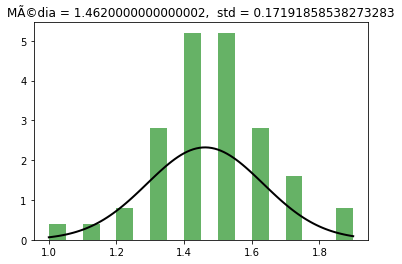

In [ ]:
array = df_iris[df_iris['target'] == 0]['petal length (cm)'].tolist()

norm = NormalUnivariate(array)
norm.plot_pdf()

In [ ]:
norm.pdf(1.4)

2.174430137613872

### Multivariada

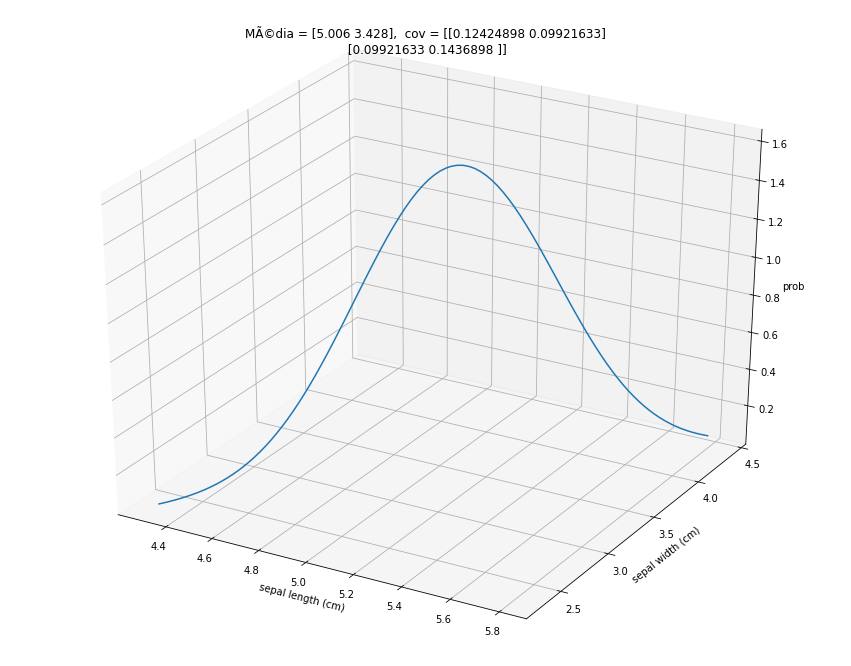

In [ ]:
df_class_0 = df_iris[df_iris['target'] == 0].drop(['target'], axis=1)[['sepal length (cm)',	'sepal width (cm)']].copy()

norm = NormalMultivariate(df_class_0)
norm.plot_pdf('sepal length (cm)',	'sepal width (cm)') 

# Iris

In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)

In [ ]:
realizations_iris = p.pipeline(
     df_iris, 
     model_name='classifier_bayes',
     col_target='target',
     train_size=0.8,
     n_realizations=20
)

Realization 1
acc:  1.0
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]



Realization 2
acc:  1.0
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]



Realization 3
acc:  1.0
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]



Realization 4
acc:  1.0
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]



Realization 5
acc:  0.9333333333333333
matrix confusion:
 [[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  1.  9.]]



Realization 6
acc:  0.9666666666666667
matrix confusion:
 [[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  0. 10.]]



Realization 7
acc:  1.0
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]



Realization 8
acc:  0.9666666666666667
matrix confusion:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  1.  9.]]



Realization 9
acc:  0.9333333333333333
matrix confusion:
 [[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  1.  9.]]



Realization 10
acc:  0.9333333333333333
matrix confusion:
 [[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  1.  9.]]



Real

In [ ]:
best_realization = p.select_best_realization(realizations_iris)

### only 2 attributes to plot the decision surface

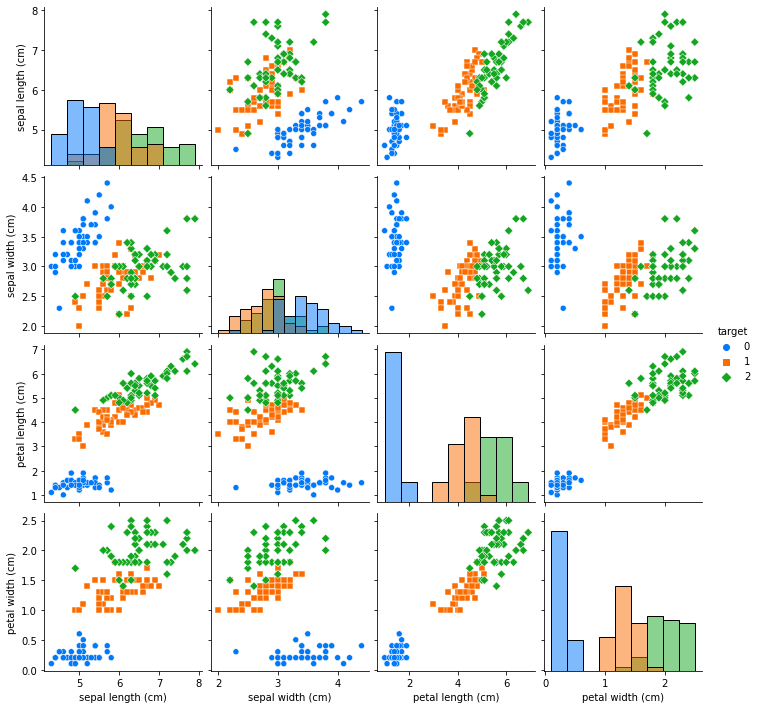

In [ ]:
sns.pairplot(df_iris, hue='target', diag_kind="hist", palette={0: '#0079fa', 1: '#fa6c00', 2: '#14a620'},markers=["o", "s", "D"])

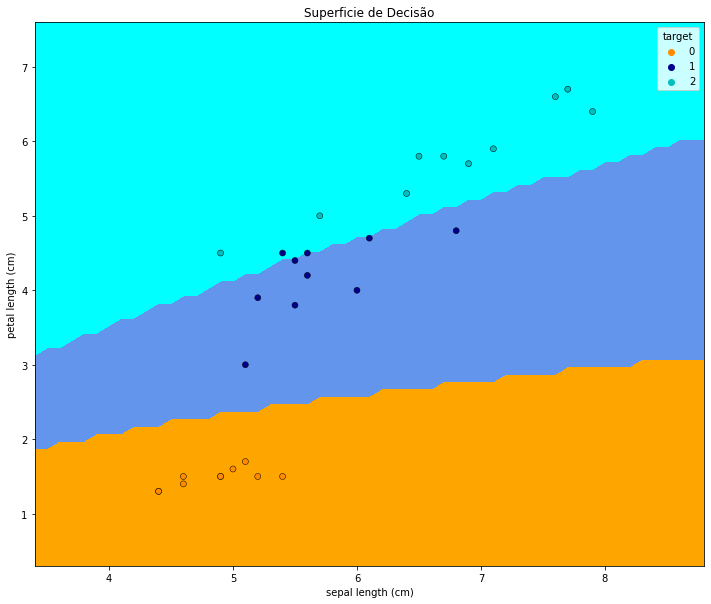

In [ ]:
bayes = ClassifierBayes()
bayes.fit(
    best_realization['train'][['sepal length (cm)', 'petal length (cm)']].copy(),
    best_realization['train']['target']
)

plots.plot_decision_boundary(
    
    best_realization['test'][['sepal length (cm)', 'petal length (cm)', 'target']].copy(),
    list_features = ['sepal length (cm)', 'petal length (cm)'],
    col_target='target',
    model = bayes,
    task = 'multiclass_classification',
    h=.1
)

# Spine

In [ ]:
list_col_names = ['incidencia_pelvica', 
                  'inclinacao_pelvica', 
                  'angulo_lordose_lombar', 
                  'inclinacao_sacral', 
                  'radio_pelvico',
                  'grau_espondilolistese', 'target']

df_spine = pd.read_csv('./datasets/vertebral_column/column_3C.dat', names = list_col_names, sep=' ')
dict_ = dict(zip(df_spine['target'].unique().tolist(), range(len(df_spine['target'].unique().tolist()))))

df_spine['target'] = df_spine['target'].apply(lambda row: dict_[row])

for col in df_spine.columns:
    if col != 'target':
        df_spine = utils.normalize_col(df_spine, col)

In [ ]:
df_spine.head(2)

,incidencia_pelvica,inclinacao_pelvica,angulo_lordose_lombar,inclinacao_sacral,radio_pelvico,grau_espondilolistese,target
0,0.355710,0.519829,0.229193,0.250879,0.307452,0.025163,0
1,0.124518,0.296713,0.098622,0.144642,0.476718,0.036359,0


In [ ]:
df_spine['target'].value_counts()

1    150
2    100
0     60
Name: target, dtype: int64

In [ ]:
df_spine.corr().style.background_gradient(cmap='coolwarm')

,incidencia_pelvica,inclinacao_pelvica,angulo_lordose_lombar,inclinacao_sacral,radio_pelvico,grau_espondilolistese,target
incidencia_pelvica,1.000000,0.629186,0.717286,0.814959,-0.247484,0.638733,-0.029070
inclinacao_pelvica,0.629186,1.000000,0.432760,0.062327,0.032660,0.397840,-0.211708
angulo_lordose_lombar,0.717286,0.432760,1.000000,0.598389,-0.080368,0.533665,0.036762
inclinacao_sacral,0.814959,0.062327,0.598389,1.000000,-0.342147,0.523571,0.120511
radio_pelvico,-0.247484,0.032660,-0.080368,-0.342147,1.000000,-0.026073,0.234737
grau_espondilolistese,0.638733,0.397840,0.533665,0.523571,-0.026073,1.000000,-0.119522
target,-0.029070,-0.211708,0.036762,0.120511,0.234737,-0.119522,1.000000


In [ ]:
realizations_spine = p.pipeline(
     df_spine, 
     model_name='classifier_bayes',
     col_target='target',
     train_size=0.8,
     n_realizations=20
)

Realization 1
acc:  0.8548387096774194
matrix confusion:
 [[ 7.  0.  5.]
 [ 1. 29.  0.]
 [ 2.  1. 17.]]



Realization 2
acc:  0.8225806451612904
matrix confusion:
 [[ 7.  0.  5.]
 [ 1. 28.  1.]
 [ 2.  2. 16.]]



Realization 3
acc:  0.8064516129032258
matrix confusion:
 [[ 6.  1.  5.]
 [ 0. 30.  0.]
 [ 3.  3. 14.]]



Realization 4
acc:  0.7580645161290323
matrix confusion:
 [[ 6.  1.  5.]
 [ 0. 30.  0.]
 [ 6.  3. 11.]]



Realization 5
acc:  0.7903225806451613
matrix confusion:
 [[ 7.  1.  4.]
 [ 0. 30.  0.]
 [ 5.  3. 12.]]



Realization 6
acc:  0.8064516129032258
matrix confusion:
 [[ 8.  0.  4.]
 [ 0. 29.  1.]
 [ 6.  1. 13.]]



Realization 7
acc:  0.8064516129032258
matrix confusion:
 [[ 4.  1.  7.]
 [ 0. 29.  1.]
 [ 1.  2. 17.]]



Realization 8
acc:  0.8225806451612904
matrix confusion:
 [[ 5.  0.  7.]
 [ 0. 30.  0.]
 [ 1.  3. 16.]]



Realization 9
acc:  0.8387096774193549
matrix confusion:
 [[ 8.  2.  2.]
 [ 0. 30.  0.]
 [ 6.  0. 14.]]



Realization 10
acc:  0.82258064516129

In [ ]:
best_realization = p.select_best_realization(realizations_spine)

### only 2 attributes to plot the decision surface

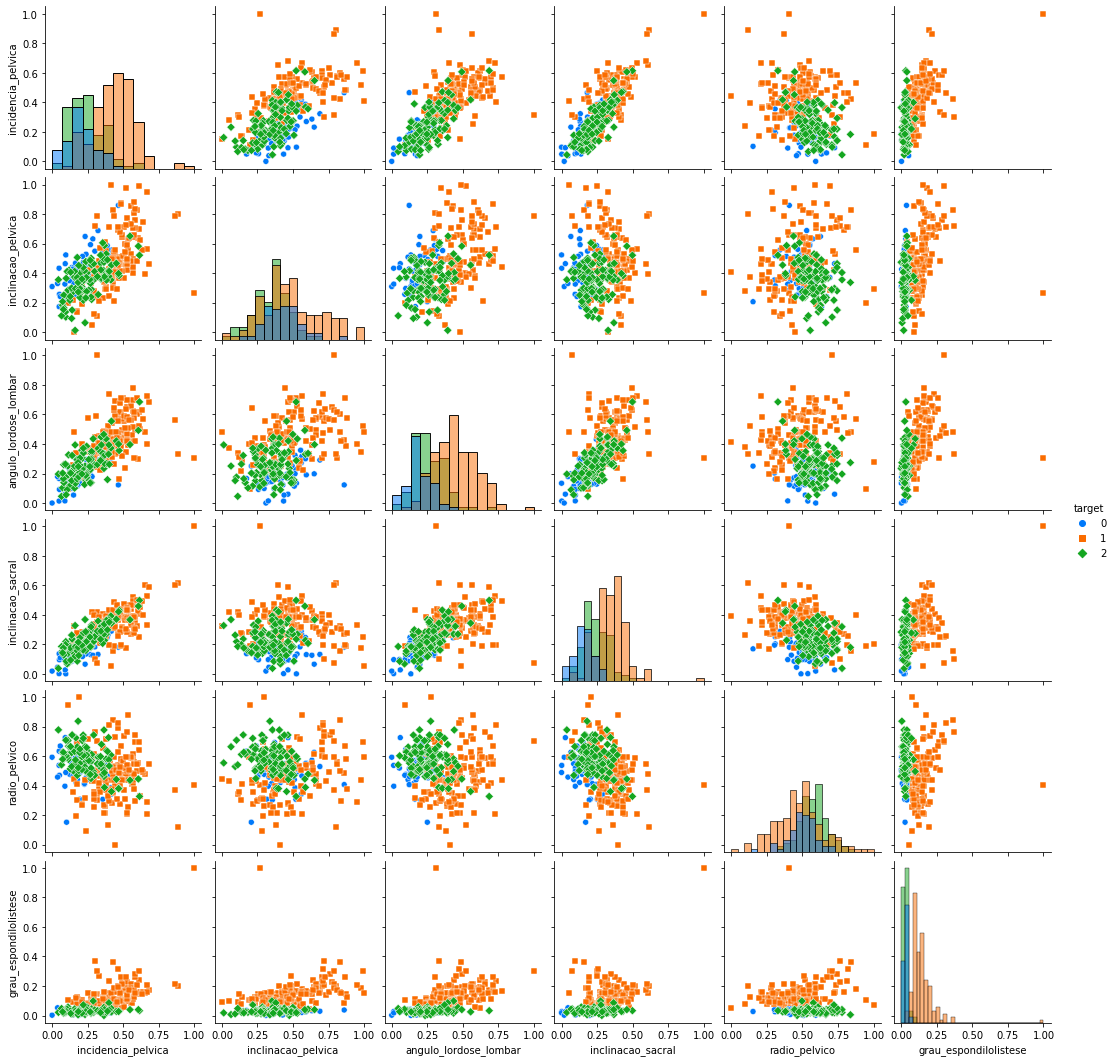

In [ ]:
sns.pairplot(df_spine,hue='target', diag_kind="hist", palette={0: '#0079fa', 1: '#fa6c00', 2: '#14a620'},markers=["o", "s", "D"])

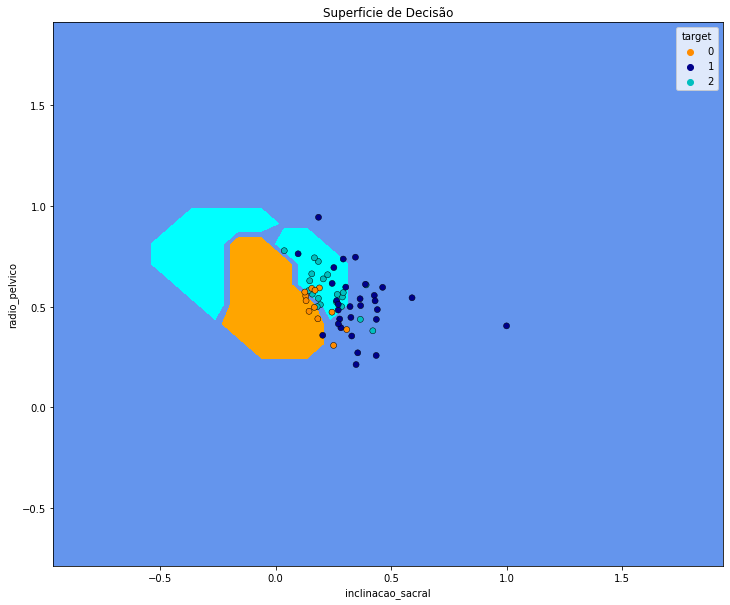

In [ ]:
bayes = ClassifierBayes()
columns = ['inclinacao_sacral',  'radio_pelvico']
bayes.fit(
    best_realization['train'][columns].copy(),
    best_realization['train']['target']
)
	
plots.plot_decision_boundary(
    
    best_realization['test'][columns + ['target']].copy(),
    list_features = columns,
    col_target='target',
    model = bayes,
    task = 'multiclass_classification',
    h=.1
)

# Breast Cancer

In [ ]:
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = pd.Series(data.target)

df_cancer['target'].value_counts() # 0 = 'malignant', 1 = 'benign'

1    357
0    212
Name: target, dtype: int64

In [ ]:
realizations_breast_cancer = p.pipeline(
     df_cancer, 
     model_name='classifier_bayes',
     col_target='target',
     train_size=0.8,
     n_realizations=20
)

Realization 1


/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/models/ClassifierBayes.py:145: RuntimeWarning: invalid value encountered in double_scalars
  prob_class[j] =  (dict_pdf[j] * self.dict_priori[j]) / normalize


acc:  0.911504424778761
matrix confusion:
 [[39.  3.]
 [ 6. 65.]]



Realization 2


/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/models/ClassifierBayes.py:145: RuntimeWarning: invalid value encountered in double_scalars
  prob_class[j] =  (dict_pdf[j] * self.dict_priori[j]) / normalize


acc:  0.9557522123893806
matrix confusion:
 [[42.  0.]
 [ 4. 67.]]



Realization 3
acc:  0.9469026548672567
matrix confusion:
 [[40.  2.]
 [ 4. 67.]]



Realization 4
acc:  0.9823008849557522
matrix confusion:
 [[42.  0.]
 [ 2. 69.]]



Realization 5
acc:  0.9823008849557522
matrix confusion:
 [[42.  0.]
 [ 2. 69.]]



Realization 6
acc:  0.9203539823008849
matrix confusion:
 [[36.  6.]
 [ 3. 68.]]



Realization 7
acc:  0.9646017699115044
matrix confusion:
 [[42.  0.]
 [ 4. 67.]]



Realization 8
acc:  0.9557522123893806
matrix confusion:
 [[39.  3.]
 [ 2. 69.]]



Realization 9
acc:  0.9734513274336283
matrix confusion:
 [[41.  1.]
 [ 2. 69.]]



Realization 10
acc:  0.9380530973451328
matrix confusion:
 [[37.  5.]
 [ 2. 69.]]



Realization 11
acc:  0.9823008849557522
matrix confusion:
 [[40.  2.]
 [ 0. 71.]]



Realization 12


/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/models/ClassifierBayes.py:145: RuntimeWarning: invalid value encountered in double_scalars
  prob_class[j] =  (dict_pdf[j] * self.dict_priori[j]) / normalize


acc:  0.9646017699115044
matrix confusion:
 [[40.  2.]
 [ 2. 69.]]



Realization 13
acc:  0.9734513274336283
matrix confusion:
 [[40.  2.]
 [ 1. 70.]]



Realization 14
acc:  0.9203539823008849
matrix confusion:
 [[37.  5.]
 [ 4. 67.]]



Realization 15
acc:  0.9557522123893806
matrix confusion:
 [[39.  3.]
 [ 2. 69.]]



Realization 16
acc:  0.9646017699115044
matrix confusion:
 [[40.  2.]
 [ 2. 69.]]



Realization 17
acc:  0.9646017699115044
matrix confusion:
 [[42.  0.]
 [ 4. 67.]]



Realization 18


/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/models/ClassifierBayes.py:145: RuntimeWarning: invalid value encountered in double_scalars
  prob_class[j] =  (dict_pdf[j] * self.dict_priori[j]) / normalize


acc:  0.9292035398230089
matrix confusion:
 [[41.  1.]
 [ 6. 65.]]



Realization 19
acc:  0.9734513274336283
matrix confusion:
 [[40.  2.]
 [ 1. 70.]]



Realization 20


/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_02/models/ClassifierBayes.py:145: RuntimeWarning: invalid value encountered in double_scalars
  prob_class[j] =  (dict_pdf[j] * self.dict_priori[j]) / normalize


acc:  0.9646017699115044
matrix confusion:
 [[40.  2.]
 [ 1. 70.]]



********** Final Result **********
Acurracy:  0.9561946902654868
Std:  0.02176703340928998


# Artificial I

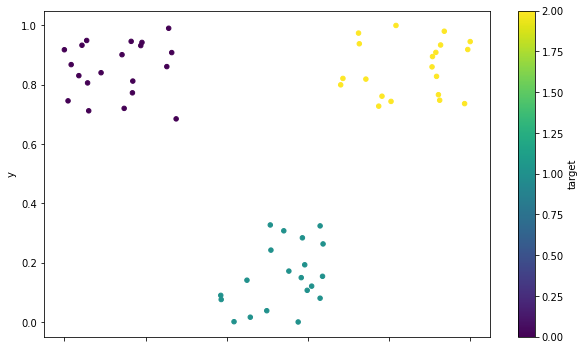

In [ ]:
conjunto_1 = utils.make_coords(coord_limit_x = (-1, 1), 
                               coord_limit_y = (3, 5),
                               target= 0,
                               len_set = 20) # Top left

conjunto_2 = utils.make_coords(coord_limit_x = (1.5, 3), 
                               coord_limit_y = (-1, 1),
                               target= 1,
                               len_set = 20) # Botton left

conjunto_3 = utils.make_coords(coord_limit_x = (3, 5), 
                               coord_limit_y = (3, 5),
                               target= 2,
                               len_set = 20) # Bottom right


df_artificial_1 = pd.DataFrame(data= conjunto_1 + conjunto_2 + conjunto_3, columns=['x', 'y', 'target'])
for col in df_artificial_1.columns:
    if col != 'target':
        df_artificial_1 = utils.normalize_col(df_artificial_1, col)

df_artificial_1.plot.scatter( x='x', y='y', c='target', colormap='viridis', figsize=(10,6))

In [ ]:
df_artificial_1['target'].value_counts()

2    20
1    20
0    20
Name: target, dtype: int64

In [ ]:
realizations_artificial = p.pipeline(
     df_artificial_1, 
     model_name='classifier_bayes',
     col_target='target',
     train_size=0.8,
     n_realizations=20
)

Realization 1
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 2
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 3
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 4
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 5
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 6
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 7
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 8
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 9
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 10
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 11
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



Realization 12
acc:  1.0
matrix confusion:
 [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]



R

In [ ]:
best_realization = p.select_best_realization(realizations_artificial)

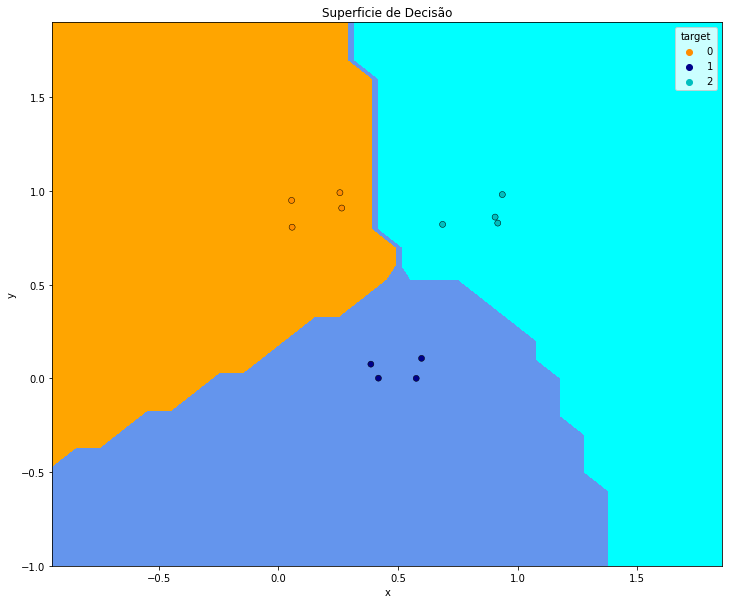

In [ ]:
plots.plot_decision_boundary(
    
    best_realization['test'].copy(),
    list_features = ['x', 'y'],
    col_target='target',
    model = best_realization['model'],
    task = 'multiclass_classification',
    h=.1
)

# Dermatology

In [ ]:
list_col_names = [
      'erythema',
      'scaling',
      'definite borders',
      'itching',
      'koebner phenomenon',
      'polygonal papules',
      'follicular papules',
      'oral mucosal involvement',
      'knee and elbow involvement',
     'scalp involvement',
     'family history',
     'melanin incontinence',
     'eosinophils in the infiltrate',
     'PNL infiltrate',
     'fibrosis of the papillary dermis',
     'exocytosis',
     'acanthosis',
     'hyperkeratosis',
     'parakeratosis',
     'clubbing of the rete ridges',
     'elongation of the rete ridges',
     'thinning of the suprapapillary epidermis',
     'spongiform pustule',
     'munro microabcess',
     'focal hypergranulosis',
     'disappearance of the granular layer',
     'vacuolisation and damage of basal layer',
     'spongiosis',
     'saw-tooth appearance of retes',
     'follicular horn plug',
     'perifollicular parakeratosis',
     'inflammatory monoluclear inflitrate',
     'band-like infiltrate',
     'age', 
     'target']

df_dermatology = pd.read_csv('./datasets/dermatology/dermatology.data', names = list_col_names)
df_dermatology['age'] =  pd.to_numeric(df_dermatology['age'], downcast='integer', errors='coerce')

df_dermatology['target'] = df_dermatology['target'].apply(lambda y: (y - 1)) # Formatando a variável resposta para começar do 0

df_dermatology = df_dermatology.fillna(df_dermatology.mean()).astype('int32') # Preenchendo valores null com média

In [ ]:
df_dermatology.head(3)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,target
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,2


In [ ]:
realizations_dermatology = p.pipeline(
     df_dermatology, 
     model_name='classifier_bayes',
     col_target='target',
     train_size=None,
     n_realizations=20
)

Realization 1
acc:  0.9590163934426229
matrix confusion:
 [[111.   0.   0.   1.   0.   0.]
 [  2.  59.   0.   0.   0.   0.]
 [  0.   0.  72.   0.   0.   0.]
 [  0.  10.   0.  38.   1.   0.]
 [  1.   0.   0.   0.  51.   0.]
 [  0.   0.   0.   0.   0.  20.]]



Realization 2
acc:  0.9590163934426229
matrix confusion:
 [[111.   0.   0.   1.   0.   0.]
 [  2.  59.   0.   0.   0.   0.]
 [  0.   0.  72.   0.   0.   0.]
 [  0.  10.   0.  38.   1.   0.]
 [  1.   0.   0.   0.  51.   0.]
 [  0.   0.   0.   0.   0.  20.]]



Realization 3
acc:  0.9590163934426229
matrix confusion:
 [[111.   0.   0.   1.   0.   0.]
 [  2.  59.   0.   0.   0.   0.]
 [  0.   0.  72.   0.   0.   0.]
 [  0.  10.   0.  38.   1.   0.]
 [  1.   0.   0.   0.  51.   0.]
 [  0.   0.   0.   0.   0.  20.]]



Realization 4
acc:  0.9590163934426229
matrix confusion:
 [[111.   0.   0.   1.   0.   0.]
 [  2.  59.   0.   0.   0.   0.]
 [  0.   0.  72.   0.   0.   0.]
 [  0.  10.   0.  38.   1.   0.]
 [  1.   0.   0.   0.  51.   0